In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("topic_relabelled_full.csv")
df['Month'] = pd.to_datetime(df['timestamp']).dt.to_period('M') # extract month
df['Toxic'] = df['predicted_label'].apply(lambda x: 1 if x == 'toxic' else 0) # label toxic comments as 1

In [4]:
monthly_toxicity = df.groupby(['Month', 'new_topic'])['Toxic'].mean().reset_index() # group by month and topic, calculate proportion
monthly_toxicity['Month'] = monthly_toxicity['Month'].dt.to_timestamp()
monthly_toxicity

,Month,new_topic,Toxic
0,2020-01-01,1,0.329114
1,2020-01-01,2,0.250000
2,2020-01-01,3,0.177778
3,2020-01-01,6,0.159509
4,2020-01-01,7,0.185629
...,...,...,...
353,2023-10-01,4,0.229508
354,2023-10-01,5,0.146341
355,2023-10-01,6,0.285714
356,2023-10-01,8,0.336683


/var/folders/m1/8hpzpvj13gv31qbqb9jz7v7c0000gn/T/ipykernel_97208/257547395.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policy_govt['Toxic_MA'] = policy_govt.groupby('new_topic')['Toxic'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


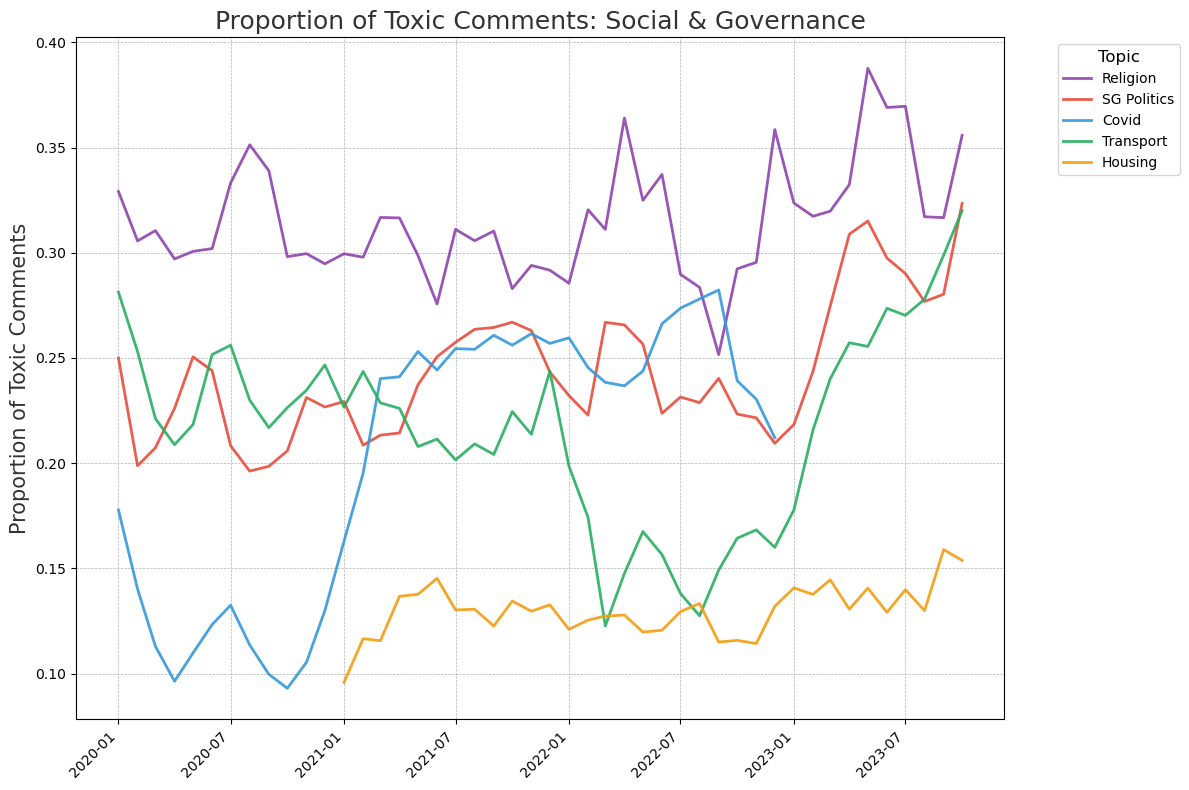

In [ ]:
# Plot selected societal and governance topics
# Subset and prepare data
policy_govt = monthly_toxicity[(monthly_toxicity['new_topic'].isin([1, 2, 3, 5, 8]))]

# Define a mapping for topic names and colors
topic_names = {1: "Religion", 2: "SG Politics", 3: "Covid", 5: "Housing", 8: "Transport"}
topic_colors = {1: "#8E44AD", 2: "#E74C3C", 3: "#3498DB", 5: "#F39C12", 8: "#27AE60"}

# Apply rolling mean to smooth the data
policy_govt['Toxic_MA'] = policy_govt.groupby('new_topic')['Toxic'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(12, 8))

# Plot each topic line with its custom label and color
for topic in policy_govt['new_topic'].unique():
    topic_data = policy_govt[policy_govt['new_topic'] == topic]
    label = topic_names.get(topic, f"Topic {topic} (Smoothed)")
    color = topic_colors.get(topic, "grey")  # Default to grey if topic color isn't specified
    plt.plot(topic_data['Month'], topic_data['Toxic_MA'], label=label, color=color, linewidth=2, alpha=0.9)

# Customize legend
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Title and labels with larger font size
plt.title("Proportion of Toxic Comments: Societal & Governance", fontsize=18, color="#333333")
plt.ylabel("Proportion of Toxic Comments", fontsize=15, color="#333333")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visual structure
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

/var/folders/m1/8hpzpvj13gv31qbqb9jz7v7c0000gn/T/ipykernel_97208/1552781449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment['Toxic_MA'] = entertainment.groupby('new_topic')['Toxic'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


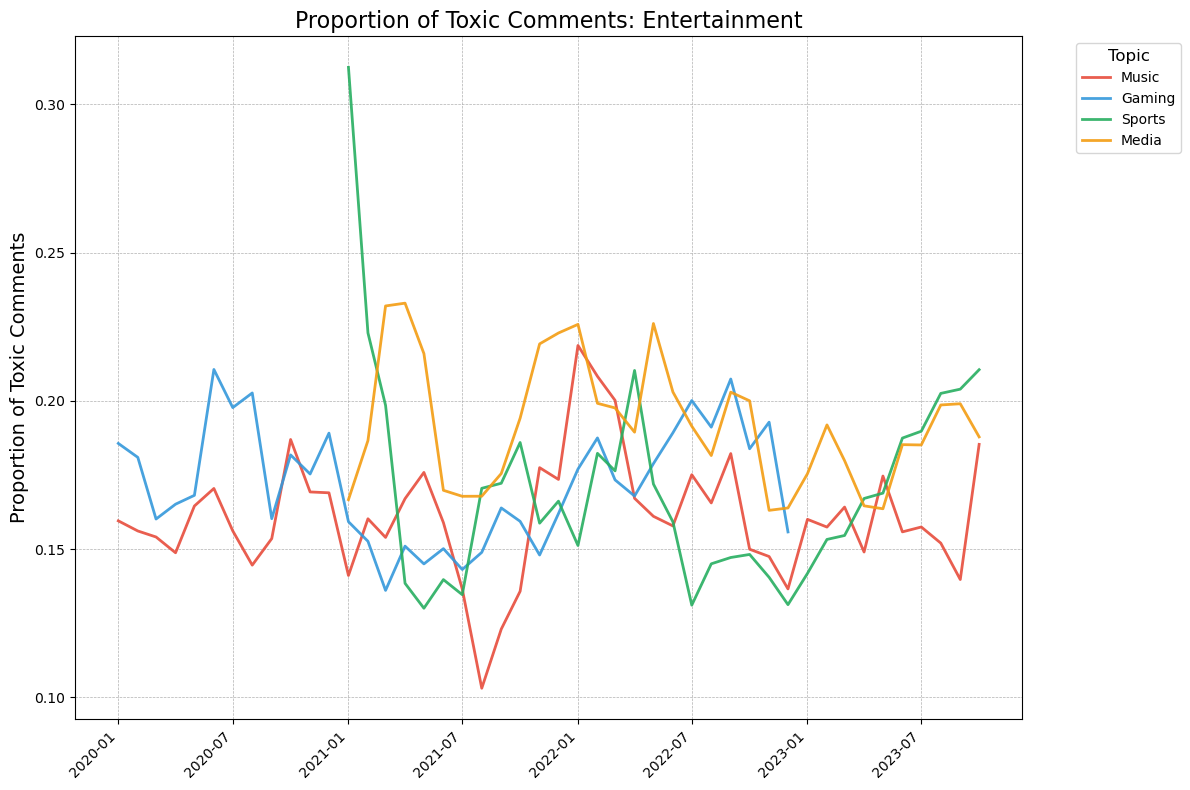

In [13]:
# Plot selected entertainment topics
entertainment = monthly_toxicity[(monthly_toxicity['new_topic'].isin([4, 6, 7, 9]))]

# Define a mapping for topic numbers to names and colors
topic_names = {4: "Sports", 6: "Music", 7: "Gaming", 9: "Media",}
topic_colors = {4: "#27AE60", 6: "#E74C3C", 7: "#3498DB", 9: "#F39C12"}

# Calculate the moving average with a window of 3 months
entertainment['Toxic_MA'] = entertainment.groupby('new_topic')['Toxic'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(12, 8))

# Plot each topic line with its custom label and color
for topic in entertainment['new_topic'].unique():
    topic_data = entertainment[entertainment['new_topic'] == topic]
    label = topic_names.get(topic, f"Topic {topic} (Smoothed)")
    color = topic_colors.get(topic, "grey")  # Default to grey if topic color isn't specified
    plt.plot(topic_data['Month'], topic_data['Toxic_MA'], label=label, color=color, linewidth=2, alpha=0.9)

# Customize legend
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Title and labels with larger font size
plt.title("Proportion of Toxic Comments: Entertainment", fontsize=16)
plt.ylabel("Proportion of Toxic Comments", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visual structure
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()